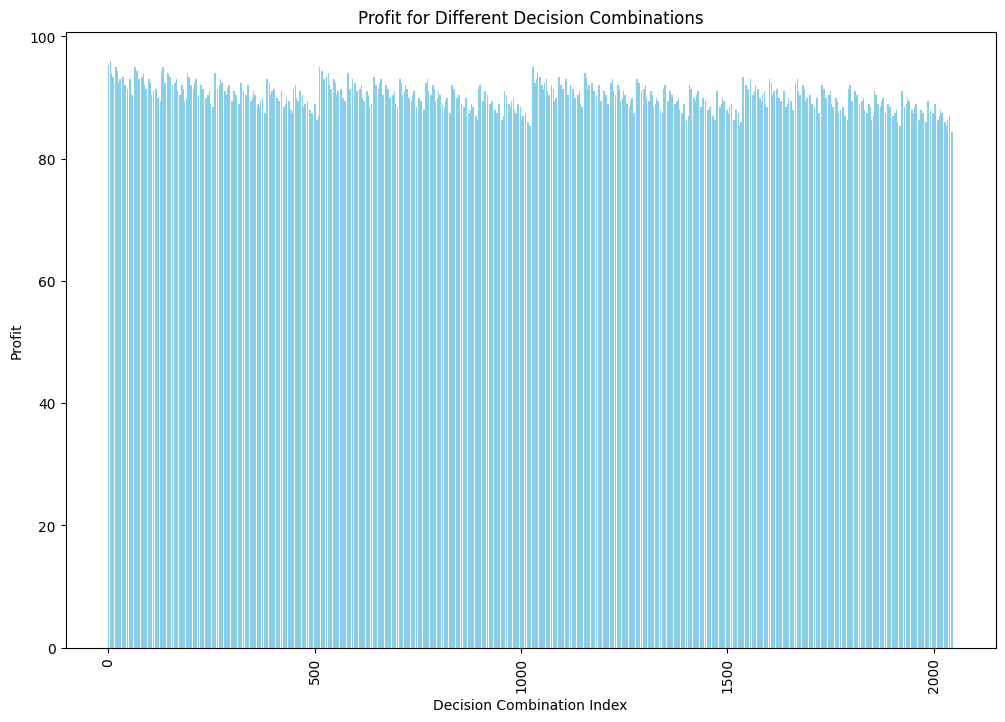

In [2]:

import numpy as np
import matplotlib.pyplot as plt
import itertools
import pandas as pd

# 参数设定
params = {
    'm': 8,  # 零配件数量
    'n': 2,  # 半成品数量
    'p': [0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10],  # 零配件次品率
    'c': [2, 8, 12, 2, 8, 12, 8, 12],  # 购买单价
    'd': [1, 1, 2, 1, 1, 2, 1, 2],  # 检测成本
    'a': [8, 8],  # 装配成本
    'pf': 0.10,  # 成品次品率
    's': 200,  # 市场售价
    'l': 40,  # 调换损失
    'r': 6  # 拆解费用
}

# 决策变量
decisions = [0, 1]

# 利润计算函数
def calculate_profit(D, C, R, params):
    cost_parts = sum(params['c'][i] + params['d'][i] * D[i] for i in range(params['m']))
    cost_subassemblies = sum(params['a'][j] + (params['d'][params['m'] + j] if j < len(params['d']) - params['m'] else 0) * C[j] for j in range(params['n']))
    revenue = params['s'] * (1 - params['pf'])
    cost_rework = params['r'] * R * params['pf']
    loss_replacement = params['l'] * params['pf']
    profit = revenue - cost_parts - cost_subassemblies - cost_rework - loss_replacement
    return profit

# 遍历所有可能的决策组合
profits = []
decision_combinations = list(itertools.product(decisions, repeat=params['m'] + params['n'] + 1))
for combo in decision_combinations:
    D = combo[:params['m']]
    C = combo[params['m']:params['m'] + params['n']]
    R = combo[-1]
    profit = calculate_profit(D, C, R, params)
    profits.append(profit)

# 转换为DataFrame以便可视化
df = pd.DataFrame(decision_combinations, columns=[f'D{i}' for i in range(params['m'])] + [f'C{j}' for j in range(params['n'])] + ['R'])
df['Profit'] = profits

# 绘制决策变量对利润的影响图
plt.figure(figsize=(12, 8))
plt.bar(df.index, df['Profit'], color='skyblue')
plt.xlabel('Decision Combination Index')
plt.ylabel('Profit')
plt.title('Profit for Different Decision Combinations')
plt.xticks(rotation=90)
plt.show()
